In [1]:
# model 套件
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
import math
import warnings
warnings.filterwarnings('ignore')


# Second Preprocessing

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [3]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [4]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('BayesianRidge_Pre/Input_C_050.csv')
# df1 = pd.read_csv('Input_C_057.csv')
# df2 = pd.read_csv('Input_C_050.csv')

In [6]:
title = ['Input_C_135','Input_A1_011','Input_A3_011','Input_C_059','Input_C_056',
         'Input_A2_011','Input_C_051','Input_A4_011','Input_A5_011']

# title = ['Input_C_135','Input_A1_011','Input_A3_011','Input_C_059','Input_C_056',
#          'Input_A2_011','Input_C_051','Input_A4_011','Input_A5_011']

In [7]:
# 直接執行轉換拉到最下面會發現 Wraninig
for col in title: # Predict 不做轉換
    if abs(df[col].skew()) >= 0.7: # 取偏態絕對值大於 0.5的項
        print(col)
        pt = PowerTransformer() # PowerTransformer 預設為 Yeo-Johson 轉換可轉正負數，不同於另一種 Box-Cox 只能用於正數
        d = pt.fit_transform(df[col].values.reshape(-1, 1)).flatten()
        df[col]=d

Input_C_135
Input_A1_011
Input_A3_011
Input_C_056
Input_A2_011
Input_C_051
Input_A4_011
Input_A5_011


In [8]:
X = df[title]
scaler = RobustScaler()
df[title] = scaler.fit_transform(X)
y = df['Predict']

In [9]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [10]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

# Split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LassoCV

In [12]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00011


In [13]:
y_pred = lasso.predict(X_test)

In [14]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.7238


In [15]:
print("Percentage mse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage mse score: 38.13


In [16]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 39


In [17]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.001411


In [18]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      99.419200
std        0.278386
min       98.544881
10%       99.069396
20%       99.228643
30%       99.319467
40%       99.391846
50%       99.429131
60%       99.455697
70%       99.540073
80%       99.640478
90%       99.789204
max       99.999756
Name: Predict, dtype: float64

In [19]:
lasso.coef_

array([ 0.00051578, -0.00037509, -0.00044064,  0.        ,  0.        ,
       -0.00014017,  0.00092066, -0.00022919, -0.        ])

# Linear regresssion

In [20]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, np.sqrt(y_train))

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [21]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, pow(y_pred,2)))

Mean squared error: 0.000002


In [22]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, pow(y_pred,2))))

Root mean squared error: 0.001421


In [23]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test,pow(y_pred,2)))

R2 score: 0.7195


In [24]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("Linear regression score: %.4f"
      % regr.score(X_train,np.sqrt(y_train)))

Linear regression score: 0.8038


In [25]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, pow(y_pred,2)))

Percentage mse score: 28.27


In [26]:
# y_test : len 103
print("Number lower than error: %d"   
      % pNumber(y_test, pow(y_pred,2), 15))

Number lower than error: 43


In [27]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      21.929996
std       17.924655
min        0.125022
10%        3.582949
20%        9.420825
30%       11.749256
40%       14.356433
50%       17.178463
60%       21.716172
70%       26.150073
80%       30.973948
90%       41.827903
max       91.103073
Name: Predict, dtype: float64

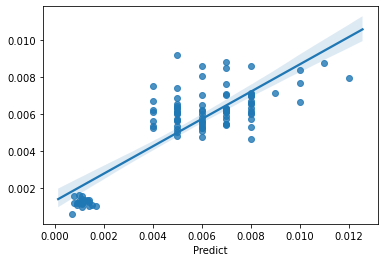

In [28]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, pow(y_pred,2))

In [29]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - pow(y_pred,2))

(0.34490881477725566, 0.4790924258899198)

# XGBoost regression

In [30]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew


# 先調 booster / n_estimators

In [31]:
#for tuning parameters
parameters_for_testing = {
    'booster':['gbtree','gblinear','dart'],
    'n_estimators':range(10,201,10),
}

other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 5, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1828s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1066s.) Setting batch_size=6.
[Parallel(n_jobs=6)]: Batch computation too fast (0.0997s.) Setting batch_size=24.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    3.9s


[17:15:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


best params
{'booster': 'gblinear', 'n_estimators': 200}
best score
0.7633440377689866


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    6.3s finished


# 調 max_depth / min_child_weight

In [32]:
#for tuning parameters
parameters_for_testing = {
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10], 
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0280s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:    0.2s


best params
{'max_depth': 1, 'min_child_weight': 5}
best score
0.7877578417332765


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.6s finished


# 調 gamma

In [33]:
#for tuning parameters
parameters_for_testing = {
    'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 5, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
best params
{'gamma': 0}
best score
0.7877578417332765


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0309s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   7 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished


# 調 subsample / colsample_bytree

In [34]:
#for tuning parameters
parameters_for_testing = {
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 5, 'seed': 42,
 'reg_alpha': 0, 'reg_lambda': 1, 'gamma':0}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0254s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1979s.) Setting batch_size=28.


best params
{'colsample_bytree': 0.4, 'subsample': 0.7}
best score
0.7926091582129692


[Parallel(n_jobs=6)]: Done 192 out of 192 | elapsed:    0.4s finished


# reg_alpha / reg_lambda

In [35]:
#for tuning parameters
parameters_for_testing = {
    'reg_alpha': [0,0.05, 0.1, 0.5 , 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5 , 1, 2, 3]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 5, 'seed': 42,
 'gamma':0,'subsample':0.7,'colsample_bytree': 0.4}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0255s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  11 out of 126 | elapsed:    0.1s remaining:    1.6s


Fitting 3 folds for each of 42 candidates, totalling 126 fits
best params
{'reg_alpha': 0, 'reg_lambda': 1}
best score
0.7926091582129692


[Parallel(n_jobs=6)]: Done 126 out of 126 | elapsed:    0.3s finished


# learning_rate

In [36]:
#for tuning parameters
parameters_for_testing = {
   'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]
}

other_params = {'booster':'gbtree', 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 5, 'seed': 42,
 'gamma':0,'subsample':0.7,'colsample_bytree': 0.4,'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best params
{'learning_rate': 0.1}
best score
0.7926091582129692


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0236s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.0s finished


In [37]:
best_xgb_model = XGBRegressor(
              learning_rate = 0.1,
              booster = 'gbtree', 
              n_estimators = 60, 
              max_depth = 1, 
              min_child_weight = 5,
              seed = 42,
              gamma = 0,
              subsample = 0.7,
              colsample_bytree = 0.4,
              reg_alpha =  0,
              reg_lambda = 1)

best_xgb_model.fit(X_train,np.sqrt(y_train))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=1,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
y_pred = best_xgb_model.predict(X_test)

In [39]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.7354


In [40]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage rmse score: 29.76


In [41]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 15))

Number lower than error: 48


In [42]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,pow(y_pred,2))))

Root mean squared error: 0.001381


In [43]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      21.625111
std       20.544399
min        0.134003
10%        3.103244
20%        5.146425
30%       10.357825
40%       12.281823
50%       17.384952
60%       21.205527
70%       24.951196
80%       30.523523
90%       48.216516
99%       81.461308
max      131.300290
Name: Predict, dtype: float64

In [44]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % best_xgb_model.score(X_train,np.sqrt(y_train)))

XGBoost regression score: 0.8126


# DecisionTree

In [45]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(
            criterion ='mse', 
            random_state = 42
)

In [46]:
param_grid = {'max_depth': range(1,10,1),
              'min_samples_split': range(2,16,2)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1254s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.1s


best params
{'max_depth': 2, 'min_samples_split': 2}
best score
0.7988768709251399


[Parallel(n_jobs=6)]: Batch computation too fast (0.0484s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 189 out of 189 | elapsed:    0.3s finished


In [47]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,10,1)
              }
    
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 2,
            min_samples_split = 2,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0126s.) Setting batch_size=30.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'max_leaf_nodes': 3, 'min_samples_leaf': 1}
best score
0.8003778778617132


[Parallel(n_jobs=6)]: Done 216 out of 216 | elapsed:    0.1s finished


In [48]:
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 2,
            min_samples_split = 2,
            max_leaf_nodes = 3,
            min_samples_leaf = 1,
            random_state = 42
)
# 訓練模型
clf.fit(X_train,np.sqrt(y_train))

# 預測測試集
y_pred = clf.predict(X_test)

In [49]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.         0.         0.         0.         0.
 0.02931078 0.         0.97068922]


In [50]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.7405


In [51]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage rmse score: 24.85


In [52]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,pow(y_pred,2))))

Root mean squared error: 0.001367


In [53]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      19.179561
std       15.875519
min        1.447516
10%        1.862507
20%        3.793480
30%        9.417838
40%       15.526442
50%       18.262981
60%       18.262981
70%       22.229394
80%       26.954817
90%       44.931459
max       81.164323
Name: Predict, dtype: float64

#  RandomForest

In [54]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(
          criterion ='mse', 
          random_state = 42
)

In [55]:
param_grid = {
              'n_estimators': range(5,51,5),
              'max_depth': range(1,10,1),
              'min_samples_split': range(2,10,1)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0872s.) Setting batch_size=4.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0557s.) Setting batch_size=28.
[Parallel(n_jobs=6)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 452 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 760 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Batch computation too slow (2.0016s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done 1068 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Batch computation too slow (2.2253s.) Setting batch_size=7.
[Parallel(n_jobs=6)]: Done 1320 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 1432 tasks      |

best params
{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 40}
best score
0.7910272147118786


[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:   13.6s finished


In [56]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,15,1)
              }
    
clf = RandomForestRegressor(
            criterion ='mse', 
            n_estimators = 40,
            max_depth = 2,
            min_samples_split = 2,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0722s.) Setting batch_size=4.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 117 candidates, totalling 351 fits


[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1868s.) Setting batch_size=8.
[Parallel(n_jobs=6)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 172 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 260 tasks      | elapsed:    1.7s


best params
{'max_leaf_nodes': 4, 'min_samples_leaf': 9}
best score
0.7930003130236908


[Parallel(n_jobs=6)]: Done 351 out of 351 | elapsed:    2.2s finished


In [57]:
clf = RandomForestRegressor( 
            criterion ='mse', 
            n_estimators = 40,
            max_depth = 2,
            min_samples_split = 2,
            max_leaf_nodes = 4,
            min_samples_leaf = 9,
            random_state = 42) 
#給予max_depth 可以避免過度擬和

# 訓練模型
clf.fit(X_train,np.sqrt(y_train))

# 預測測試集
y_pred = clf.predict(X_test)

In [58]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.04743867 0.38683938 0.04854311 0.02420936 0.0242769  0.02438297
 0.03317883 0.07184176 0.33928902]


In [59]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.7413


In [60]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage rmse score: 28.06


In [61]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,pow(y_pred,2))))

Root mean squared error: 0.001365


In [62]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    103.000000
mean      20.580582
std       19.169982
min        0.695566
10%        1.291365
20%        6.143568
30%       10.631270
40%       15.147154
50%       18.205361
60%       18.794589
70%       21.873621
80%       28.403687
90%       43.496616
max      129.810400
Name: Predict, dtype: float64

In [63]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 